In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load data
data = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
# Drop unnecessary columns
data.drop(columns=['CustomerId', 'RowNumber', 'Surname'], inplace=True)

In [4]:
# Encode categorical variables
gender_labels = {'Female': 0, 'Male': 1}
geography_labels = {'France': 0, 'Germany': 1, 'Spain': 2}
data['Gender'] = data['Gender'].map(gender_labels)
data['Geography'] = data['Geography'].map(geography_labels)

In [5]:
# Separate features and target variable
X = data.drop('Exited', axis=1)
y = data['Exited']

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Train models
models = {
    'Logistic Regression': LogisticRegression(),
    'K Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = []

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    })

In [9]:
# Display results
for result in results:
    print(f"\n{result['Model']} Results:")
    print(f"Accuracy: {result['Accuracy']:.2f}%")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("Classification Report:")
    print(result['Classification Report'])
    print("-" * 50)


Logistic Regression Results:
Accuracy: 0.81%
Confusion Matrix:
[[1559   48]
 [ 322   71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

--------------------------------------------------

K Neighbors Results:
Accuracy: 0.84%
Confusion Matrix:
[[1519   88]
 [ 241  152]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.63      0.39      0.48       393

    accuracy                           0.84      2000
   macro avg       0.75      0.67      0.69      2000
weighted avg       0.82      0.84      0.82      2000

--------------------------------------------------

Decision Tree Results:


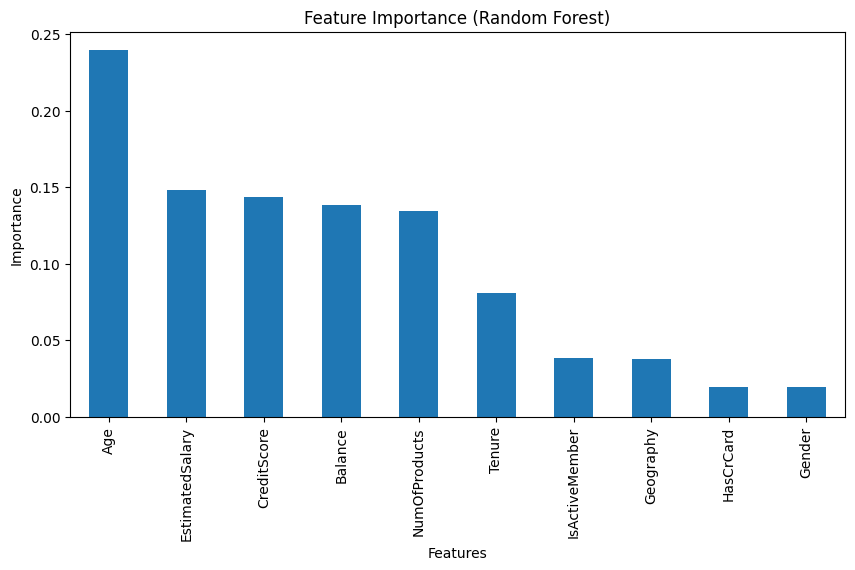

In [10]:
# Feature Importance (Random Forest)
classifier_rf = models['Random Forest']
feature_importances = pd.Series(classifier_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
feature_importances.plot.bar()
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()